In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import fts

ImportError: No module named fts

In [2]:
cd fts

[Errno 2] No such file or directory: 'fts'
/home/gjones/notebooks/2015


In [2]:
cd /home/gjones/fts/fts/

/home/gjones/fts/fts


In [3]:
import fts

In [4]:
f1 = fts.FTSData()

In [5]:
f1.load_from_npz('/data/fts/2015-09-01_13-52-06_initial_test_in_north_lab_no_absorber.npz')

In [6]:
f1.analyze('auto')

(<matplotlib.figure.Figure at 0x3a58690>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f929842e7d0>,
         <matplotlib.axes.AxesSubplot object at 0x7f9298753ad0>]], dtype=object))

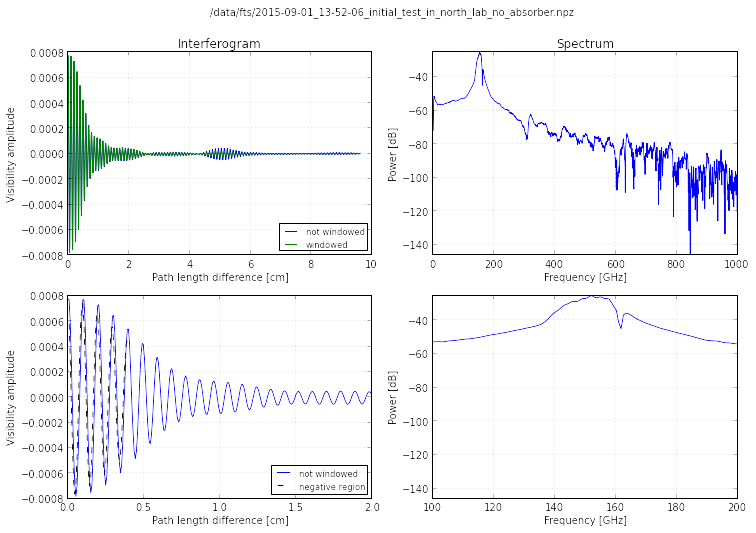

In [7]:

f1.plot_summary()

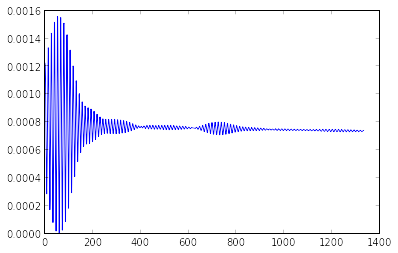

In [8]:
plot(f1.raw_visibility)

In [17]:
17*np.sqrt(11)

56.382621436041795

In [22]:
(400/17.)**2

553.6332179930797

(<matplotlib.figure.Figure at 0x7f92993b5d90>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f92996b3510>,
         <matplotlib.axes.AxesSubplot object at 0x3ce0b10>]], dtype=object))

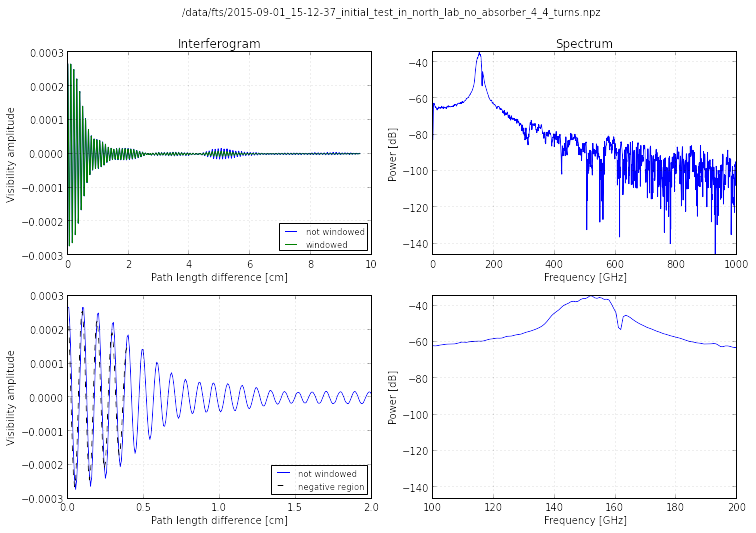

In [13]:
f2 = fts.FTSData()
f2.load_from_npz('/data/fts/2015-09-01_15-12-37_initial_test_in_north_lab_no_absorber_4_4_turns.npz')
f2.analyze('auto')
f2.plot_summary()

(<matplotlib.figure.Figure at 0x7f9298079b10>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f9299afc190>,
         <matplotlib.axes.AxesSubplot object at 0x7f9299e1e850>]], dtype=object))

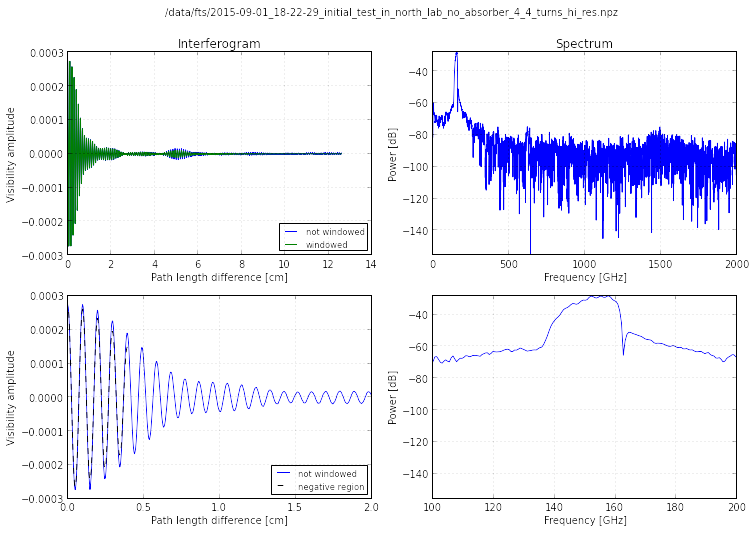

In [20]:
f3 = fts.FTSData()
f3.load_from_npz('/data/fts/2015-09-01_18-22-29_initial_test_in_north_lab_no_absorber_4_4_turns_hi_res.npz')
f3.analyze('auto')
f3.plot_summary()

(100, 200)

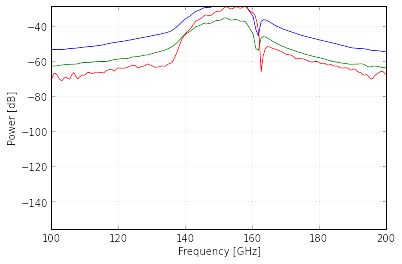

In [21]:
ax = gca()
f1.plot_spectrum(ax=ax)
f2.plot_spectrum(ax=ax)
f3.plot_spectrum(ax=ax)
xlim(100,200)

In [17]:
135/12.

11.25

In [18]:
165/12.

13.75

In [31]:
import glob

In [174]:
sweepfn = glob.glob('/data/fts/sweep*.npz')
sweepfn.sort()
sweeps = []
for fn in sweepfn:
    sweeps.append(np.load(fn))
print len(sweeps)

308


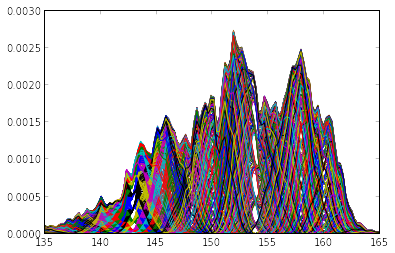

In [175]:
mags = []
for sweep in sweeps:
    hf = sweep['hittite_freqs']
    mmw = hf*12/1e9
    mag = sweep['data']
    mags.append(mag)
    plot(mmw,mag)
mags = np.array(mags)

In [176]:
mags.shape

(308, 120)

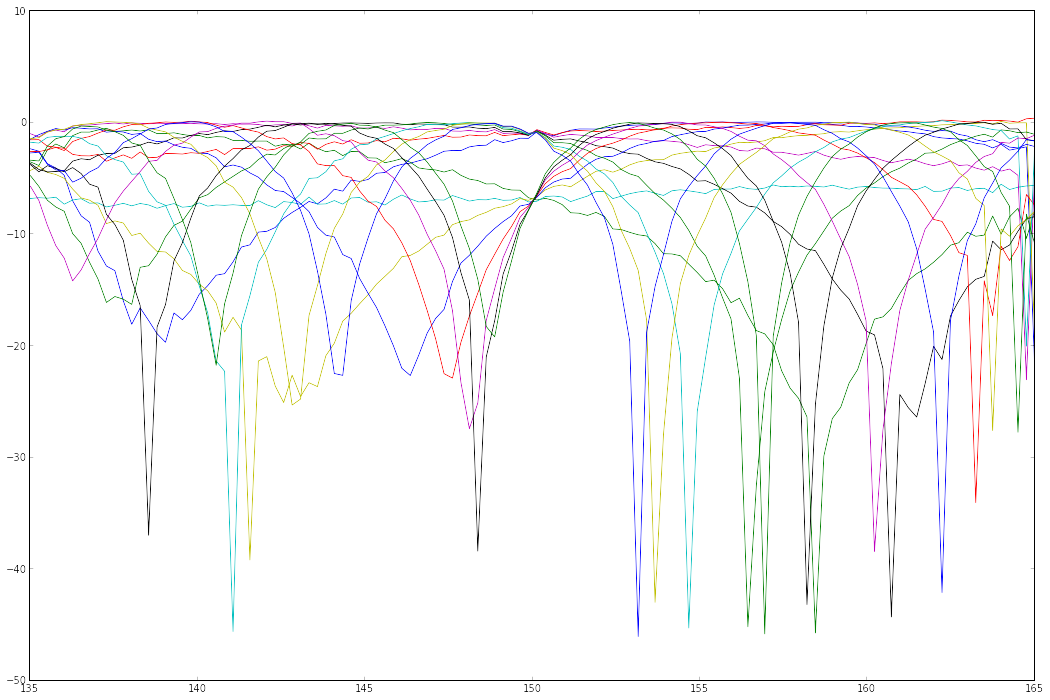

In [228]:
figure(figsize=(18,12))
for k in range(1,mags.shape[0],20):
    plot(mmw,10*np.log10(mags[k]/mags[52]))

In [178]:
norm = mags/mags[52]

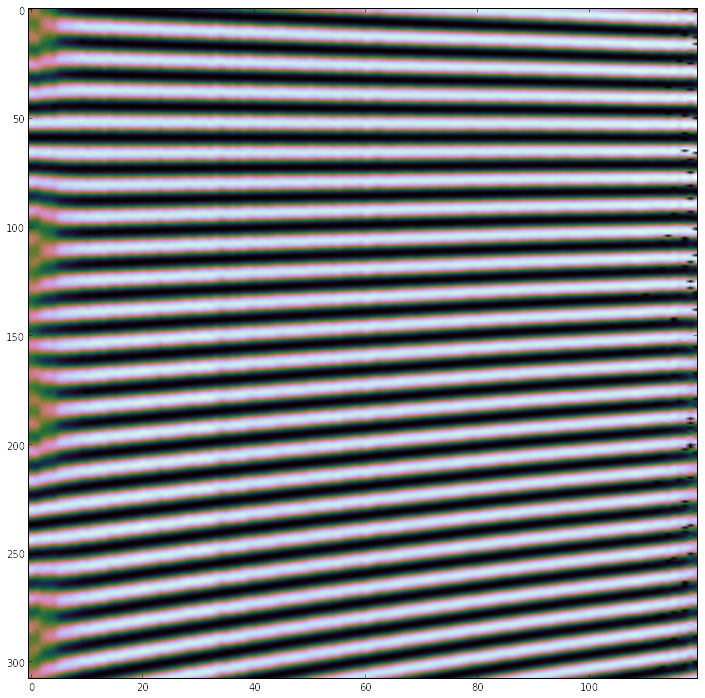

In [230]:
figure(figsize=(12,12))
imshow((norm),aspect='auto',cmap=cm.cubehelix)

(0, 40)

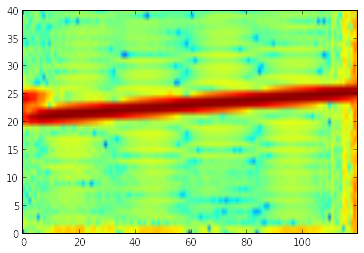

In [210]:
imshow(10*np.log10(np.abs(np.fft.rfft((norm-norm.mean(0))*np.hamming(norm.shape[0])[:,None],axis=0))),aspect='auto')
ylim(0,40)

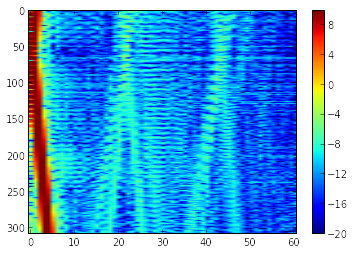

In [209]:
imshow(10*np.log10(np.abs(np.fft.rfft((norm-norm.mean(0))*np.hamming(norm.shape[1]),axis=1))),aspect='auto')
#xlim(0,10)
colorbar()
clim(-20,10)

In [160]:
8*9/5.+32

46.4

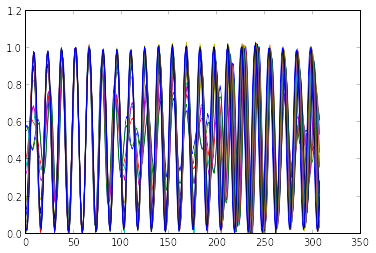

In [180]:
plot(norm[:,:15])
#plot(norm[:,100])

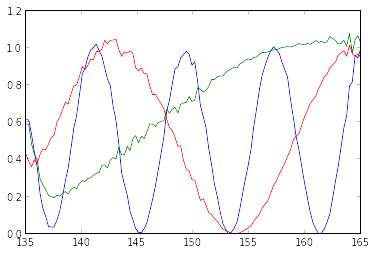

In [182]:
plot(mmw,norm[-1,:])
plot(mmw,norm[90,:])
plot(mmw,norm[150,:])

In [91]:
np.log10(mags/mags.mean(0)).sum(1).argmax()

52

In [22]:
d = np.load('/data/fts/sweep0000.npz')

In [23]:
d.keys()

['position', 'hittite_freqs', 'data']

In [26]:
hf = d['hittite_freqs']
mmw = hf*12/1e9
mag = d['data']

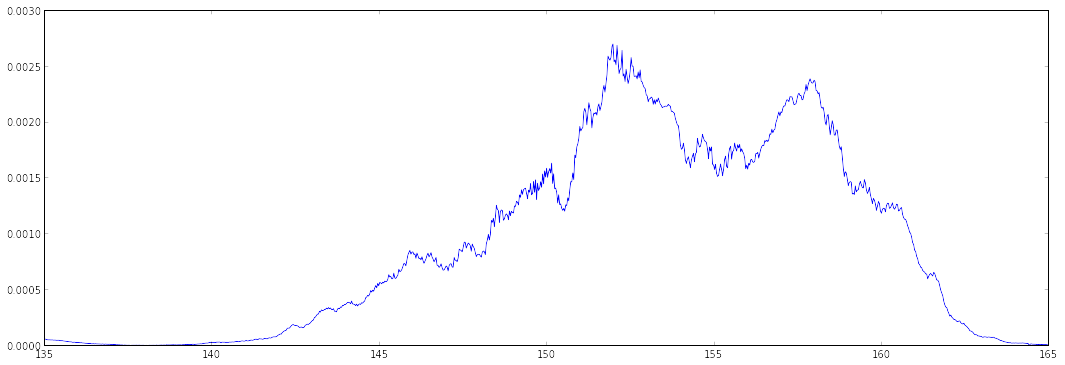

In [30]:
figure(figsize=(18,6))
plot(mmw,mag)

In [213]:
files = glob.glob('/data/fts/2015-09-*_pin_atten_broadband_4_4_turns_output_bandpass_filter_bias_*.npz')
files.sort()
del files[0]

In [216]:
fx = [fts.FTSData() for fn in files]
for f,fn in zip(fx,files):
    f.load_from_npz(fn)
    f.analyze('auto')

(100, 200)

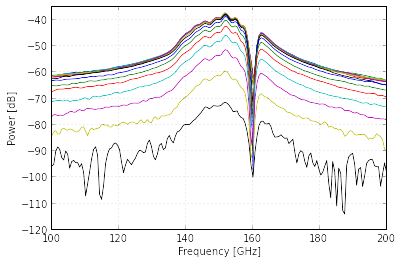

In [220]:
ax = gca()
for f in fx:
    f.plot_spectrum(ax)
ylim(-120,-35)
xlim(100,200)

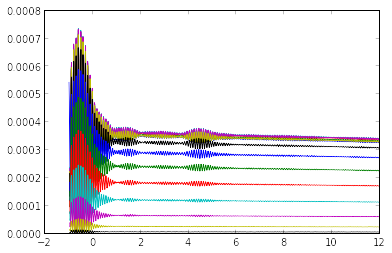

In [226]:
for f in fx:
    plot(f.raw_position,f.raw_visibility)
#xlim(-1,1)